In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# load the famous iris data
irisRaw = load_iris()

In [3]:
#Convert data to Panda package
# read iris.data into a pandas DataFrame (df), including column names
iris = pd.DataFrame(data= np.c_[irisRaw['data'], irisRaw['target']],
                     columns= irisRaw['feature_names'] + ['target'])

## 1) View the data

In [34]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [36]:
#Get row no. 2:
iris.loc[2]

sepal length (cm)    4.7
sepal width (cm)     3.2
petal length (cm)    1.3
petal width (cm)     0.2
target               0.0
Name: 2, dtype: float64

## 2) Number of rows and columns

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
target               150 non-null float64
dtypes: float64(5)
memory usage: 6.0 KB


## 3) 'describe' and 'groupby'

In [6]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
iris_grouped = iris.groupby('petal length (cm)')
iris_grouped.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
144,6.7,3.3,5.7,2.5,2.0
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0


## 4) 'head'

In [ ]:
iris.head()

## 5) 'drop'

In [ ]:
data_after_drop = iris.dropna()

print("Original data frame length:", len(iris), "\nData frame after 'dropna' length:",  
       len(data_after_drop), "\nNumber of rows with at least 1 NA value: ", 
       (len(iris)-len(data_after_drop))) 

### Answ: There is no missing data

## 6) Sorting

In [12]:
iris_sorted = iris.sort_values(by=['sepal width (cm)'])
iris_sorted.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
60,5.0,2.0,3.5,1.0,1.0
62,6.0,2.2,4.0,1.0,1.0
119,6.0,2.2,5.0,1.5,2.0
68,6.2,2.2,4.5,1.5,1.0
41,4.5,2.3,1.3,0.3,0.0


## 7) Minimum and Maximum with indexes

In [13]:
iris['petal length (cm)'].min()

1.0

In [14]:
iris['petal length (cm)'].idxmin()

22

In [15]:
iris['petal length (cm)'].max()

6.9

In [16]:
iris['petal length (cm)'].idxmax()

118

## 8) Standard deviation for each column

In [23]:
for col in iris:
    print('std for ', col, ': ', np.std(iris[col]))

std for  sepal length (cm) :  0.8253012917851409
std for  sepal width (cm) :  0.4344109677354946
std for  petal length (cm) :  1.759404065775303
std for  petal width (cm) :  0.7596926279021594
std for  target :  0.816496580927726


## 9) Comparing to average sepal length

In [29]:
sepal_length_mean = np.mean(iris['sepal length (cm)'])
print(sepal_length_mean)

5.843333333333334


In [28]:
indexes = []

for index, row in iris.iterrows():
    if row['sepal length (cm)'] > sepal_length_mean :
        indexes.append(index)
        
print(indexes)

[50, 51, 52, 54, 56, 58, 61, 62, 63, 65, 68, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83, 85, 86, 87, 91, 97, 100, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 115, 116, 117, 118, 119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149]


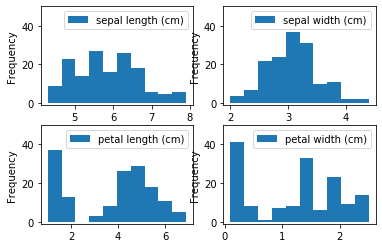

In [42]:
fig, axes = plt.subplots(nrows = 2, ncols=2)
yLim = [-1, 50]
iris.plot(kind='hist',y='sepal length (cm)', ax=axes[0,0], ylim=yLim)
iris.plot(kind='hist',y='sepal width (cm)', ax=axes[0,1], ylim=yLim)
iris.plot(kind='hist',y='petal length (cm)', ax=axes[1,0], ylim=yLim)
iris.plot(kind='hist',y='petal width (cm)', ax=axes[1,1], ylim=yLim)